# Variance d'Allan

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/dd_int/anaconda3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['average']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
def average(data, n):
    databis = data[len(data)%n:]
    datater = databis.reshape(len(databis)//n, n)
    return datater.mean(axis=1)

average(arange(8), 3)


array([ 3.,  6.])

In [29]:
def variance_allan_simple(data, n):
    data_moy = average(data, n)
    z = data_moy[1:] - data_moy[:-1]
    return np.mean(z**2)/2

In [30]:
variance_allan_simple(arange(37), 3)

4.5

In [31]:
def variance_allan(data):
    Tn = 2**arange(int(np.log2(len(data))))
    return Tn, np.array([variance_allan_simple(data, n) 
                                 for n in Tn])

variance_allan(arange(37))

(array([ 1,  2,  4,  8, 16]), array([   0.5,    2. ,    8. ,   32. ,  128. ]))

In [32]:
noise = numpy.random.normal(size=2**16)
marche_aleatoire = 0.1*numpy.cumsum(numpy.random.normal(size=2**16))

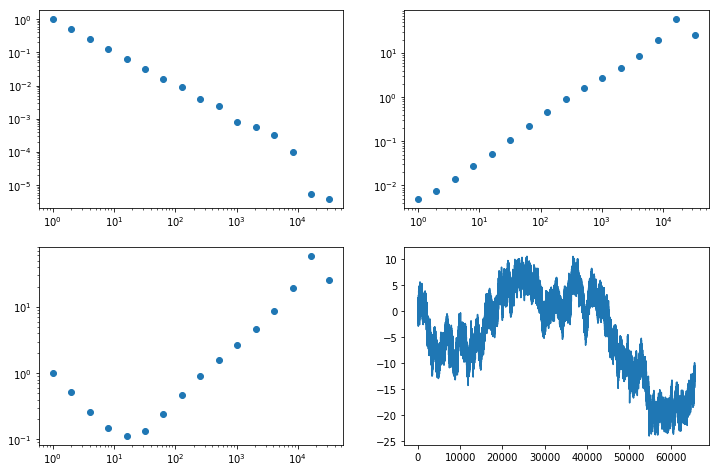

In [33]:
figure(figsize=(12, 8))
subplot(2, 2, 1)
Tn, va = variance_allan(noise)
loglog(Tn, va, 'o')
subplot(2, 2, 2)
Tn, va = variance_allan(marche_aleatoire)
loglog(Tn, va, 'o')
subplot(2, 2, 3)
Tn, va = variance_allan(noise + marche_aleatoire)
loglog(Tn, va, 'o')
subplot(2, 2, 4)
plot(noise + marche_aleatoire)

(0, 1000)

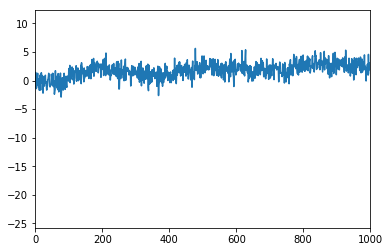

In [34]:
plot(noise + marche_aleatoire)
xlim(0, 1000)

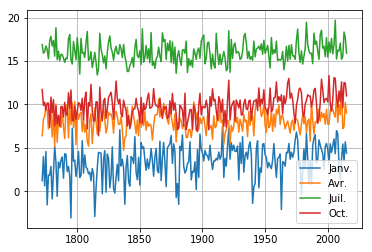

In [38]:
data = loadtxt('temperature_londres.dat')
annees = data[:,0]
janvier = data[:,1]
avril = data[:,4]
juillet = data[:,7]
octobre = data[:,10]
plot(annees, janvier, label='Janv.')
plot(annees, avril, label='Avr.')
plot(annees, juillet, label='Juil.')
plot(annees, octobre, label='Oct.')
legend()
grid()

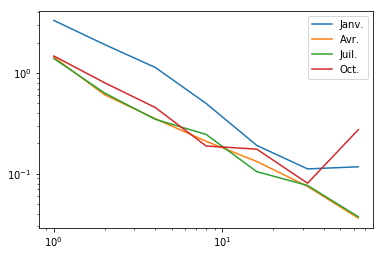

In [37]:
for mois, nom in zip([1, 4, 7, 10], ['Janv.', 'Avr.', 'Juil.', 'Oct.']):
    Tn, va = variance_allan(data[:,mois])
    loglog(Tn, va, label=nom)
legend()

In [ ]:
data = loadtxt('cac_40.csv', delimiter=',', usecols=(3,), skiprows=4, converters={3:eval})

In [ ]:
Tn, va = variance_allan(data)
loglog(Tn, va)